In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)


2.10.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

train_set = pd.read_csv(data_url, sep=", ",header = None)
test_set = pd.read_csv(test_url, sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\krzys\AppData\Local\Temp\ipykernel_11996\2049605904.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv(data_url, sep=", ",header = None)
C:\Users\krzys\AppData\Local\Temp\ipykernel_11996\2049605904.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv(test_url, sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [6]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


C:\Users\krzys\AppData\Local\Temp\ipykernel_11996\3132754484.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})
C:\Users\krzys\AppData\Local\Temp\ipykernel_11996\3132754484.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['native_country'] = dataset['native_country'].replace(d)


# Zad
Nauczmy prosty model.

In [7]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [9]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Reshape labels if necessary (for example, for categorical crossentropy)
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 3s 2ms/step - loss: 0.4774 - accuracy: 0.7749 - val_loss: 0.3890 - val_accuracy: 0.8100
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3874 - accuracy: 0.8103 - val_loss: 0.3790 - val_accuracy: 0.8086
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3788 - accuracy: 0.8124 - val_loss: 0.3743 - val_accuracy: 0.8101
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3739 - accuracy: 0.8143 - val_loss: 0.3752 - val_accuracy: 0.7926
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3724 - accuracy: 0.8122 - val_loss: 0.3778 - val_accuracy: 0.8102
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3711 - accuracy: 0.8140 - val_loss: 0.3675 - val_accuracy: 0.8108
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3711 - accuracy: 0.8137 - val_loss: 0.3747 - val_accuracy: 0.8074

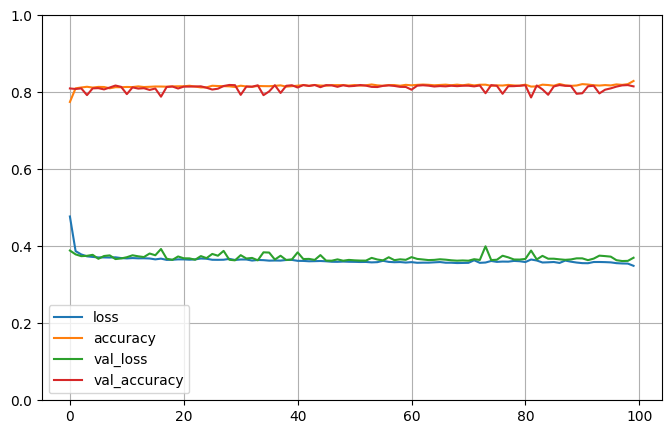

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 2s 3ms/step - loss: 0.3702 - accuracy: 0.8153


[0.370219349861145, 0.815338671207428]

In [12]:
from sklearn.metrics import accuracy_score

# Get predictions
y_pred = model.predict(X_test)

# Assuming a binary classification problem
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

471/471 [==============================] - 0s 854us/step
Accuracy: 0.8153386454183267


# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sig_model = Sequential()
sig_model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
sig_model.add(Dense(50,activation="sigmoid"))
sig_model.add(Dense(10,activation="sigmoid"))
sig_model.add(Dense(1,activation="sigmoid"))
sig_model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
sig_model.summary()

sig_history = sig_model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32,epochs=20)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 100)               4200      
                                                                 
 dense_42 (Dense)            (None, 50)                5050      
                                                                 
 dense_43 (Dense)            (None, 10)                510       
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
943/943 [==============================] - 3s 2ms/step - loss: 0.4079 - accuracy: 0.8141 - val_loss: 0.3461 - val_accuracy: 0.8459
Epoch 2/20
943/943 [=====================

In [24]:
tanh_history = History()
tanh_model = Sequential()
tanh_model.add(Dense(100,activation="tanh",input_shape=(X_train.shape[1],)))
tanh_model.add(Dense(50,activation="tanh"))
tanh_model.add(Dense(10,activation="tanh"))
tanh_model.add(Dense(1,activation="tanh"))
tanh_model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
tanh_model.summary()

tanh_history = tanh_model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32,epochs=20)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 100)               4200      
                                                                 
 dense_46 (Dense)            (None, 50)                5050      
                                                                 
 dense_47 (Dense)            (None, 10)                510       
                                                                 
 dense_48 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
943/943 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.8102 - val_loss: 0.5042 - val_accuracy: 0.8252
Epoch 2/20
943/943 [=====================

In [25]:
relu_history = History()
relu_model = Sequential()
relu_model.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
relu_model.add(Dense(50,activation="relu"))
relu_model.add(Dense(10,activation="relu"))
relu_model.add(Dense(1,activation="relu"))
relu_model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
relu_model.summary()

relu_history = relu_model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32,epochs=20)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 100)               4200      
                                                                 
 dense_50 (Dense)            (None, 50)                5050      
                                                                 
 dense_51 (Dense)            (None, 10)                510       
                                                                 
 dense_52 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
943/943 [==============================] - 2s 2ms/step - loss: 0.5712 - accuracy: 0.8102 - val_loss: 0.4313 - val_accuracy: 0.8321
Epoch 2/20
943/943 [=====================

In [26]:
elu_history = History()
elu_model = Sequential()
elu_model.add(Dense(100,activation="elu",input_shape=(X_train.shape[1],)))
elu_model.add(Dense(50,activation="elu"))
elu_model.add(Dense(10,activation="elu"))
elu_model.add(Dense(1,activation="elu"))
elu_model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
elu_model.summary()

elu_history = elu_model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32,epochs=20)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 100)               4200      
                                                                 
 dense_54 (Dense)            (None, 50)                5050      
                                                                 
 dense_55 (Dense)            (None, 10)                510       
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
943/943 [==============================] - 3s 2ms/step - loss: 0.8605 - accuracy: 0.8184 - val_loss: 0.5338 - val_accuracy: 0.8395
Epoch 2/20
943/943 [=====================

In [27]:
leakyreluleakyrelu_history = History()
leakyrelu_model = Sequential()
leakyrelu_model.add(Dense(100,activation="leaky_relu",input_shape=(X_train.shape[1],)))
leakyrelu_model.add(Dense(50,activation="leaky_relu"))
leakyrelu_model.add(Dense(10,activation="leaky_relu"))
leakyrelu_model.add(Dense(1,activation="leaky_relu"))
leakyrelu_model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
leakyrelu_model.summary()

leakyrelu_history = leakyrelu_model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32,epochs=20)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 100)               4200      
                                                                 
 dense_58 (Dense)            (None, 50)                5050      
                                                                 
 dense_59 (Dense)            (None, 10)                510       
                                                                 
 dense_60 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
943/943 [==============================] - 2s 2ms/step - loss: 0.4448 - accuracy: 0.8111 - val_loss: 0.3799 - val_accuracy: 0.8367
Epoch 2/20
943/943 [=====================

# Zad. 
Stwórz wykres porównujący metody. 

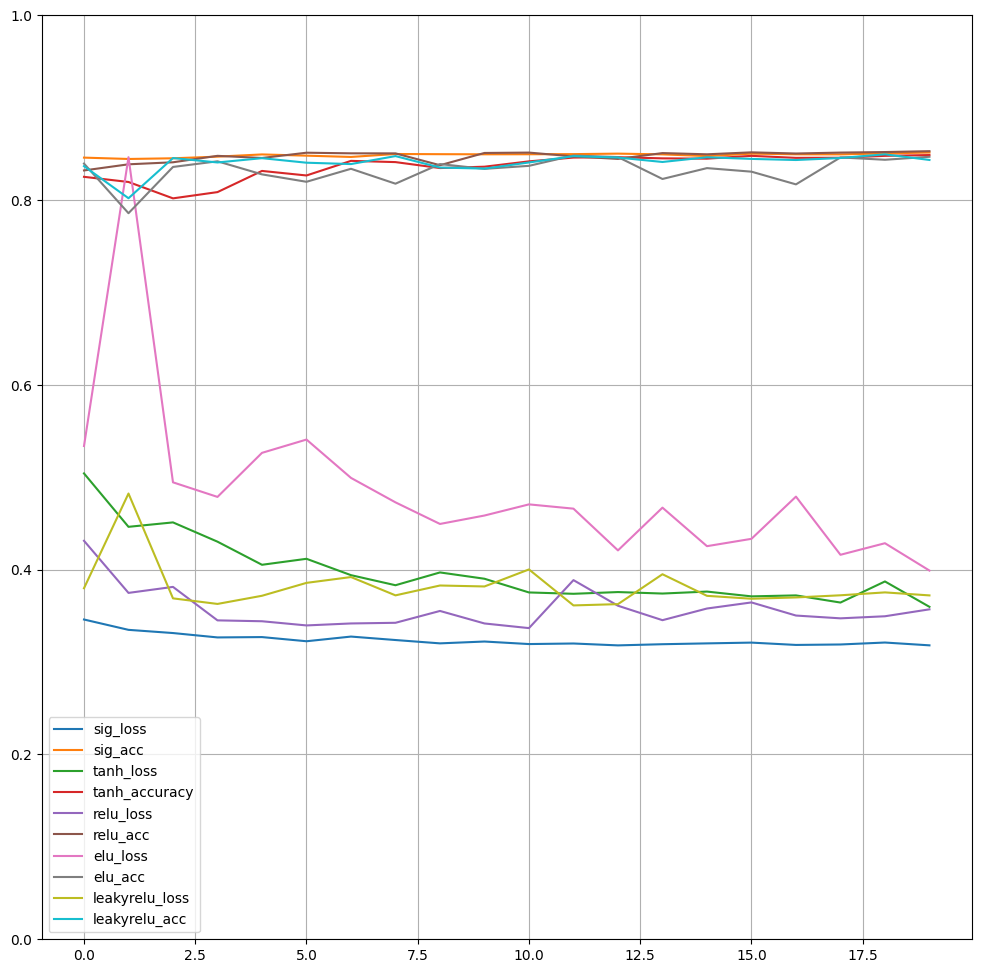

In [37]:
plt.figure(figsize=(12,12))
plt.plot(sig_history.history['val_loss'])
plt.plot(sig_history.history['val_accuracy'])
plt.plot(tanh_history.history['val_loss'])
plt.plot(tanh_history.history['val_accuracy'])
plt.plot(relu_history.history['val_loss'])
plt.plot(relu_history.history['val_accuracy'])
plt.plot(elu_history.history['val_loss'])
plt.plot(elu_history.history['val_accuracy'])
plt.plot(leakyrelu_history.history['val_loss'])
plt.plot(leakyrelu_history.history['val_accuracy'])
plt.legend(['sig_loss', 'sig_acc', 'tanh_loss', 'tanh_accuracy', 'relu_loss', 'relu_acc','elu_loss' ,'elu_acc','leakyrelu_loss', 'leakyrelu_acc'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()